In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('Outputs_o1')
import matplotlib.pyplot as plt

import HF
import numpy as np
import inspect

In [3]:
def combine_code(library, code):
    return inspect.getsource(library) + inspect.getsource(code)

In [4]:
def plot_kspace(kspace):
    fig, ax = plt.subplots(figsize=(3,3),tight_layout=True)
    ax.scatter(*kspace.T,s=2)
    ax.set_aspect('equal')
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
def plot_matele(mat):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.spy((mat))
    ax.set_title('$H_0$')
def plot_2d_bandstructure(ham,en):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(en.shape[0]):
        ax.plot_trisurf(ham.k_space[:,0],ham.k_space[:,1],en[i])
def plot_high_symm_bandstructure(k_list,en,ax=None): # DROP
    if ax is None:
        fig, ax = plt.subplots()
    for e in en:
        k_abs=np.sqrt(np.diff(k_list[:,0])**2 + np.diff(k_list[:,1])**2)
        k_abs = np.concatenate([[0],np.cumsum(k_abs)])
        ax.plot(k_abs,e,color='k')
    Nk = (k_list.shape[0]-1)//4
    for i in range(5):
        ax.axvline(k_abs[Nk*i],ls='--',color='r')
    ax.set_xticks([k_abs[Nk*i] for i in range(5)],['$\Gamma$','K','M','$\Gamma$',"K'"])
    # ax.set_xlim([k_abs[0],k_abs[-1]])

    

In [5]:
# import code_2004_04168 as lm_code
# exec(combine_code(HF, lm_code))
# from code_2004_04168 import *
# from code_2004_04168_new_3 import *
# from code_2004_04168_new_4 import *
# from code_2004_04168_new_5 import *
from code_2004_04168_new_6 import *
# from code_2004_04168_ds import *

# Check k-space

In [6]:
ham = HartreeFockHamiltonian(N_shell=10,parameters={})

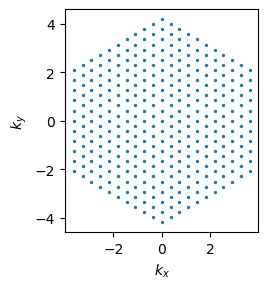

In [7]:
plot_kspace(kspace=ham.k_space)
# plt.scatter(ham.high_symm)
# plt.plot(*k_list.T)

In [ ]:
high_symm= ham.high_symmetry_points(line=None)

In [79]:
high_symm

{'Gamma': array([0, 0]),
 'M': array([0.19975211, 0.        ]),
 "M'": array([0.09987605, 0.1729904 ]),
 'K': array([0.19975211, 0.11532693]),
 "K'": array([ 0.19975211, -0.11532693])}

In [ ]:
zz=ham.compute_E_s_k()

In [84]:
np.abs(zz['up'].imag).max()

3.3306690738754696e-16

(-3.9903586013152794,
 3.9903586013152794,
 -4.607669225265031,
 4.607669225265031)

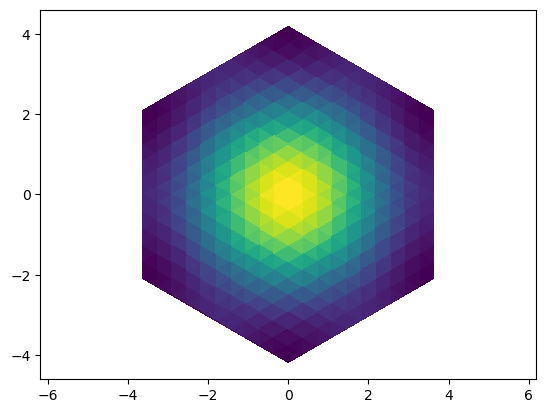

In [85]:
plt.tripcolor(ham.k_space[:,0],ham.k_space[:,1],zz['up'].real)
plt.axis('equal')

# Check Lincut/2D plot

In [8]:
# ham=PLG_manual.HartreeFockHamiltonian(N_shell=10)

In [86]:
h_nonint = ham.generate_non_interacting()

In [91]:
wf,en= diagonalize(h_nonint) # or HF.diagonalize

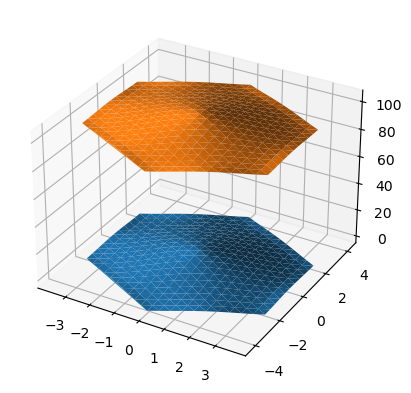

In [92]:
plot_2d_bandstructure(ham,en)

idx is the last N_flavor of the eigenvalue

In [18]:
# idx = en.shape[0]-1
idx = 0
print(idx)

0


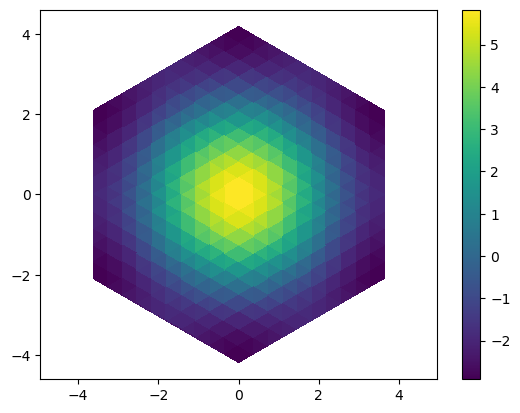

In [19]:
plt.tripcolor(ham.k_space[:,0],ham.k_space[:,1],en[idx])
plt.axis('equal')
plt.colorbar()

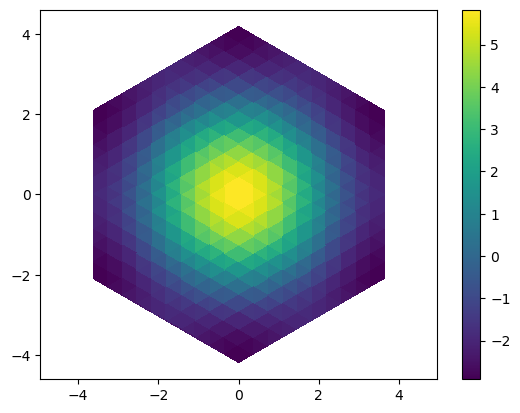

In [100]:
idx=0
plt.tripcolor(ham.k_space[:,0],ham.k_space[:,1],en[idx])
plt.axis('equal')
plt.colorbar()

# High symmetry points linecut (Skipped because of issue)

In [18]:
#ham=HartreeFockHamiltonian(N_shell=10)

Issue: No a / a_M in the code

In [19]:
k_list = generate_high_symmtry_points

In [ ]:
h_0_linecut= ham.generate_non_interacting(k_list)


In [18]:
wf,en=HF.diagonalize(h_0_linecut)

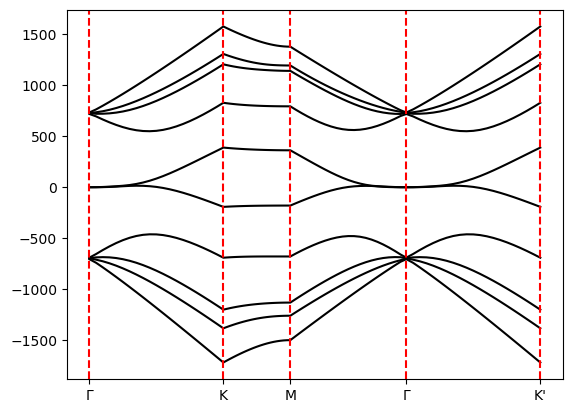

In [19]:
plot_high_symm_bandstructure(k_list,en)


In [ ]:
Mistake:
it should include valley and spin index
misses all moire superlattice
Band is too flat, I highly suspect the correctness

#  infinitesemial U limit

Manual: Figure out which parameter dials down interaction term. This might be a dict, and not a float

In [ ]:
# int_strength_default = ham.default_U_n()
# inf_u = {}
# for key in int_strength_default:
#     inf_u[key] = 1e-6*int_strength_default[key]

In [1]:
# ham_int= HartreeFockHamiltonian(N_shell=10,parameters={'U_n': inf_u})
ham_int= HartreeFockHamiltonian(N_shell=10,parameters={})

NameError: name 'HartreeFockHamiltonian' is not defined

In [150]:
wf,en= diagonalize(ham_int.generate_non_interacting())
exp_val= get_exp_val(wf,en,0.5,0)

In [151]:
wf_int, en_int, exp_val= solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


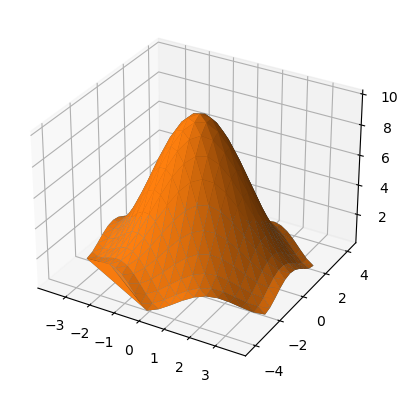

In [152]:
plot_2d_bandstructure(ham_int,en_int)

# Large U limit

Doesn't yield a different plot...

In [132]:
# int_strength_default = ham.default_U_n()
# big_u = {}
# for key in int_strength_default:
#     big_u[key] = 1e20*int_strength_default[key]

In [ ]:
# ham_int= HartreeFockHamiltonian(N_shell=10,parameters={'U_n': {(0,0):100}})
ham_int= HartreeFockHamiltonian(N_shell=10,parameters={'U_on': 1e5})

In [137]:
wf[:,:,0]

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [138]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [139]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


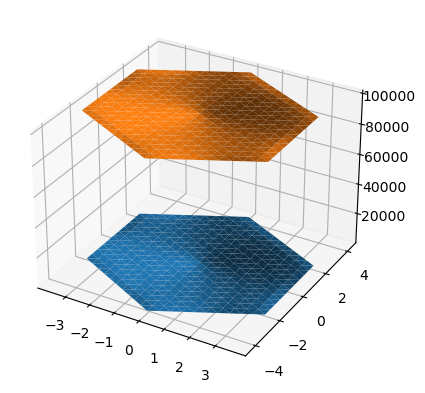

In [140]:
plot_2d_bandstructure(ham_int,en_int)

In [145]:
mean_U=np.abs(ham_int.generate_interacting(exp_val)).mean() 
mean_T=np.abs(ham_int.generate_non_interacting()).mean() 
gap = en_int[1].min()-en_int[0].max()

In [146]:
mean_U

25303.63161378167

In [147]:
print(f'Gap is {gap:.2f}')
print(f'U/T is {mean_U/mean_T:.2f}')
print(f'mean_U is {mean_U:.2f}')

Gap is 98178.18
U/T is 23982.14
mean_U is 25303.63


In [ ]:
Mistake: The summation should include different valley and spin  

# Test interacting

In [57]:
ham_int= HartreeFockHamiltonian(N_shell=10,parameters={'U_on': 100,'U_nn':0})

In [58]:
wf,en=HF.diagonalize(ham_int.generate_non_interacting())


In [59]:
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [60]:
ham_int.U_on

100

In [61]:
ham_int.U_nn

0

In [62]:
ham_int.generate_interacting(exp_val)

array([[[100.3021148+0.j, 100.3021148+0.j, 100.3021148+0.j, ...,
         100.3021148+0.j, 100.3021148+0.j, 100.3021148+0.j],
        [  0.       +0.j,   0.       +0.j,   0.       +0.j, ...,
           0.       +0.j,   0.       +0.j,   0.       +0.j]],

       [[  0.       +0.j,   0.       +0.j,   0.       +0.j, ...,
           0.       +0.j,   0.       +0.j,   0.       +0.j],
        [100.3021148+0.j, 100.3021148+0.j, 100.3021148+0.j, ...,
         100.3021148+0.j, 100.3021148+0.j, 100.3021148+0.j]]])

In [ ]:
ham_int.generate_interacting(exp_val)

array([100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.12386707+0.j, 100305.12386707+0.j, 100305.12386707+0.j,
       100305.123867

In [31]:
ham_int.get_nearest_neighbor_vectors()

[(1, 0), (0, 1), (1, 1), (-1, 0), (0, -1), (-1, -1)]

In [32]:
ham_int.U_nn

0.5

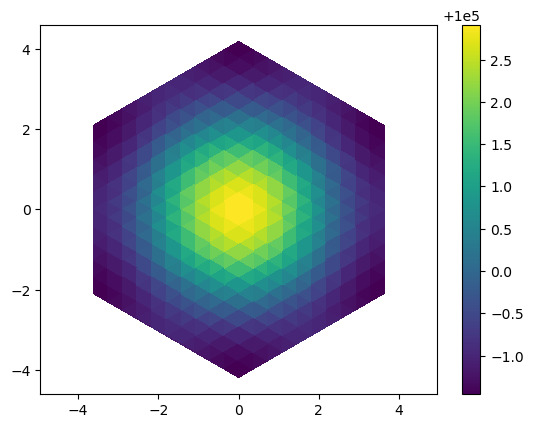

In [37]:
# plot_2d_bandstructure(ham_int,ham_int.compute_Uq(ham_int.k_space).real)
plt.tripcolor(ham_int.k_space[:,0],ham_int.k_space[:,1],ham_int.compute_Uq(ham_int.k_space).real)
plt.axis('equal')
plt.colorbar()
